In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
import time
import matplotlib

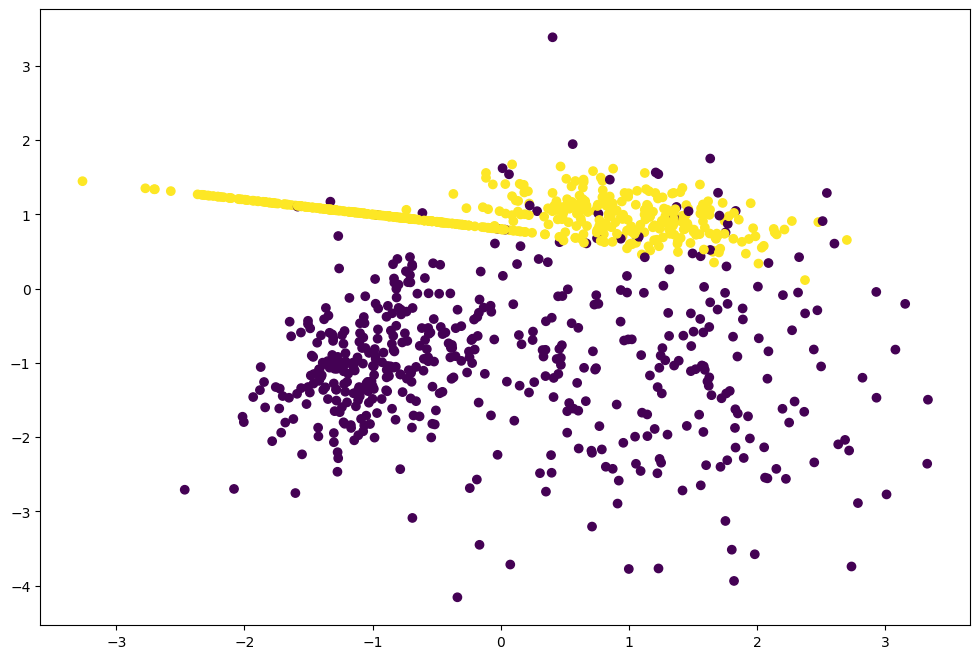

In [90]:
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=2
)

plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#lista klasyfikatorów
klasyfikatory = {'GaussianNB' : GaussianNB(), 'QuadraticDiscriminantAnalysis' : QuadraticDiscriminantAnalysis(), 'KNeighborsClassifier' : KNeighborsClassifier(), 'SVC' : SVC(probability=True), 'DecisionTreeClassifier' : DecisionTreeClassifier()}
df = pd.DataFrame(columns = klasyfikatory) #DataFrame do przechowywania uśrednionych danych
df2 = pd.DataFrame(columns = klasyfikatory) #DataFrame do generowania wykresów


for nazwa, klasyfikator in klasyfikatory.items():
    czas_train = []
    czas_pred = []
    dokladnosc = []
    czulosc = []
    precyzja = []
    F1 = []
    roc = []
    #100 razy
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y) #dane uczące i testujące
        clf = klasyfikator #inicjacja klasyfikatora

        #uczenie
        t1 = time.time()
        clf.fit(X_train, y_train)
        t2 = time.time()
        czas_train.append(t2-t1)

        #predykcja
        t1 = time.time()
        y_pred = clf.predict(X_test)
        t2 = time.time()
        czas_pred.append(t2-t1)

        dokladnosc.append(metrics.accuracy_score(y_test, y_pred)) #dokładność
        czulosc.append(metrics.recall_score(y_test, y_pred)) #czułość
        precyzja.append(metrics.precision_score(y_test, y_pred)) #precyzja
        F1.append(metrics.f1_score(y_test, y_pred)) #F1
        roc.append(metrics.roc_auc_score(y_test, y_pred)) #pole pod krzywą auc

    df2[nazwa] = [X_test, y_test, y_pred, roc[-1], X_train, y_train] #dane do rysowania wykresów
    #uśrednienie wyników i dodanie do DataFrame
    df[nazwa] = [np.mean(czas_train), np.mean(czas_pred), np.mean(dokladnosc), np.mean(czulosc), np.mean(precyzja), np.mean(F1), np.mean(roc)]
    df.index = ['train_time', 'test_time', 'accuracy_score', 'recall_score', 'precision_score', 'f1_score', 'roc_auc']


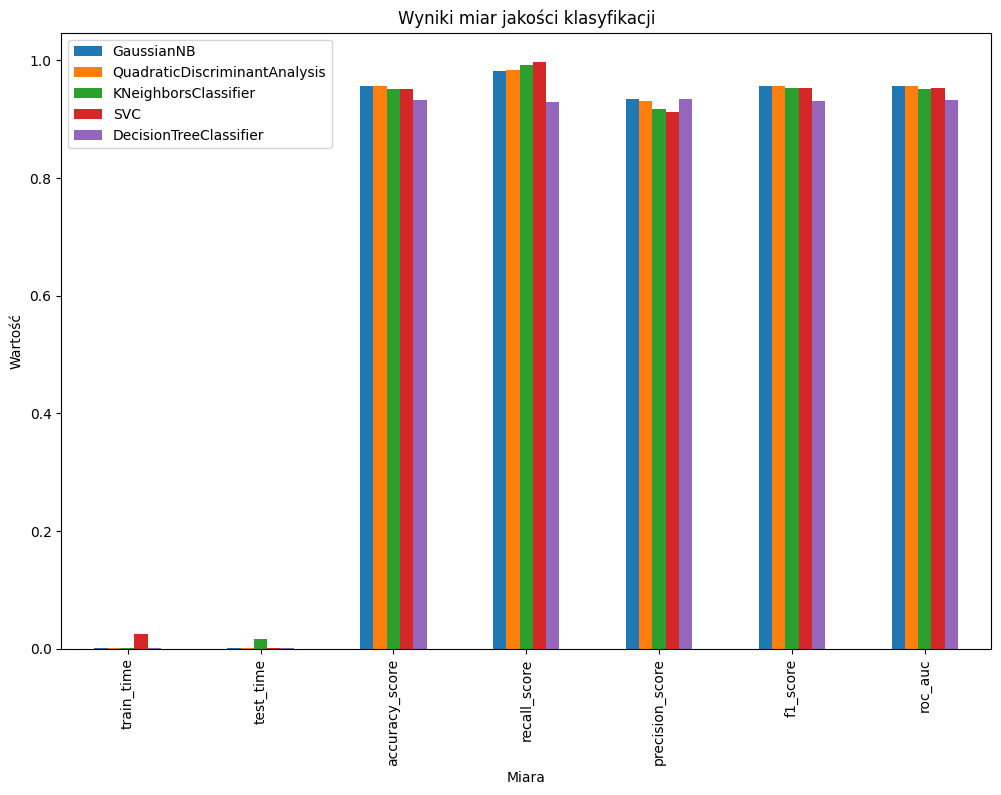

In [91]:
#Wykresy miar jakości klasyfikacji
df.plot(kind='bar', figsize=(12, 8))
plt.title("Wyniki miar jakości klasyfikacji")
plt.xlabel("Miara")
plt.ylabel("Wartość")
plt.show()

In [92]:
df

,GaussianNB,QuadraticDiscriminantAnalysis,KNeighborsClassifier,SVC,DecisionTreeClassifier
train_time,0.001406,0.001215,0.000993,0.025466,0.001821
test_time,0.000372,0.000381,0.015496,0.001701,0.000180
accuracy_score,0.956240,0.956680,0.951320,0.951640,0.932840
recall_score,0.981415,0.984358,0.991841,0.997517,0.929236
precision_score,0.933735,0.931822,0.917030,0.912222,0.935145
f1_score,0.956859,0.957205,0.952822,0.952855,0.931841
roc_auc,0.956406,0.957077,0.951557,0.952361,0.932914


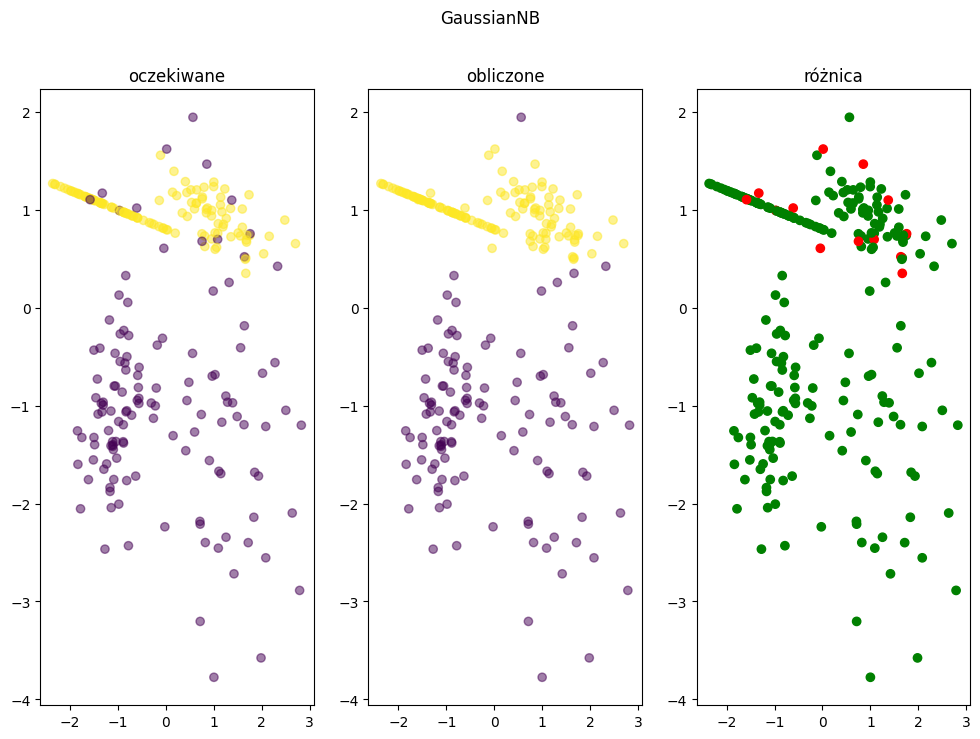

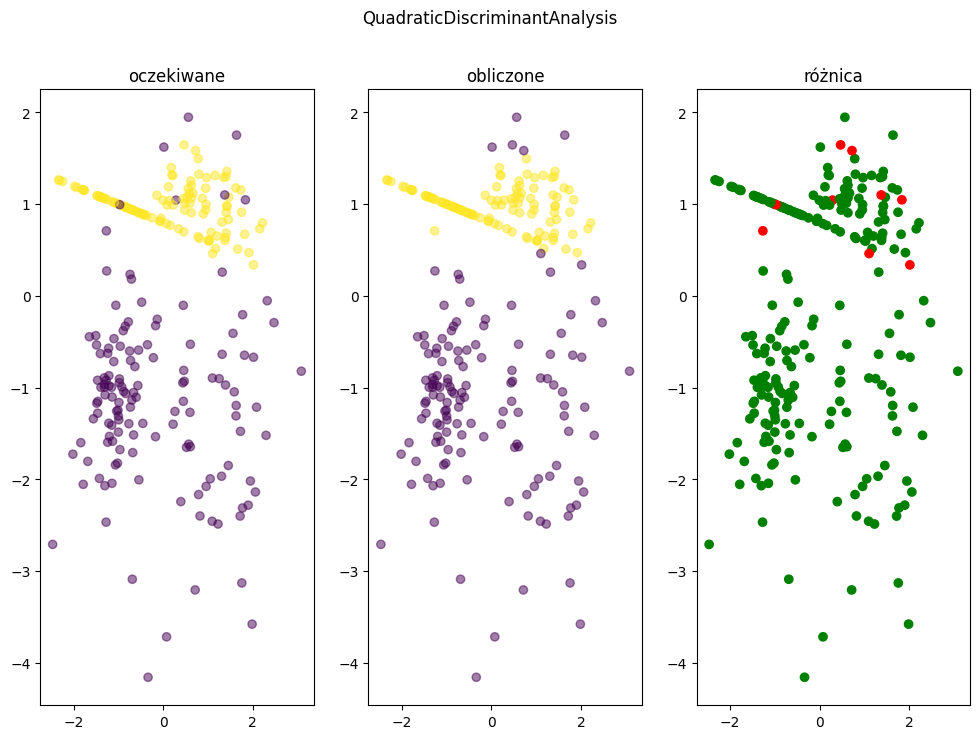

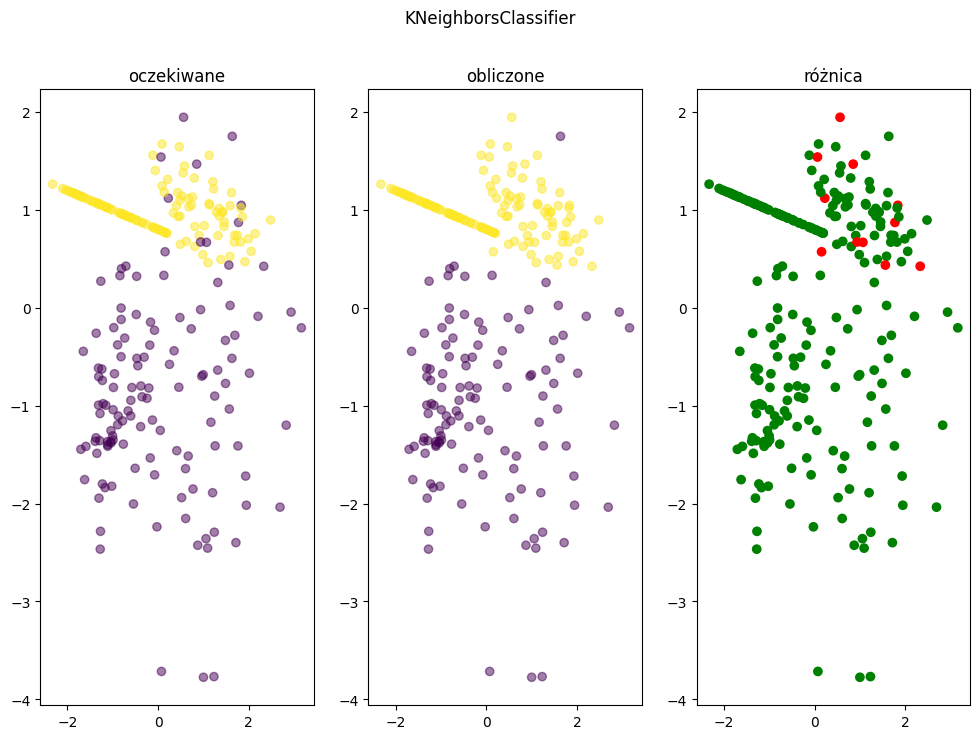

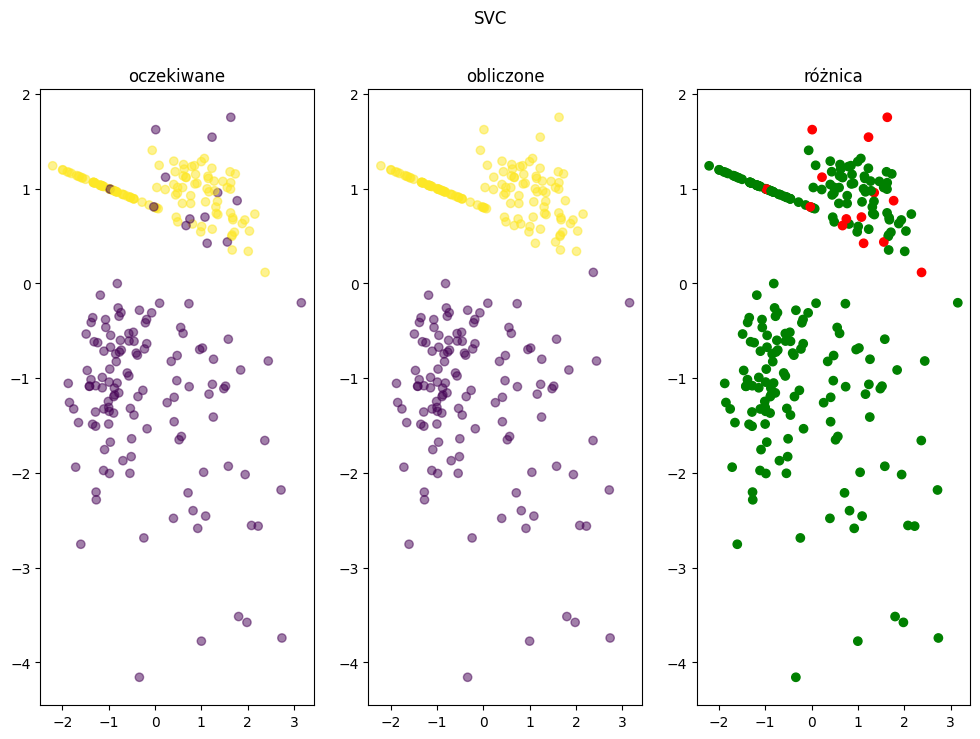

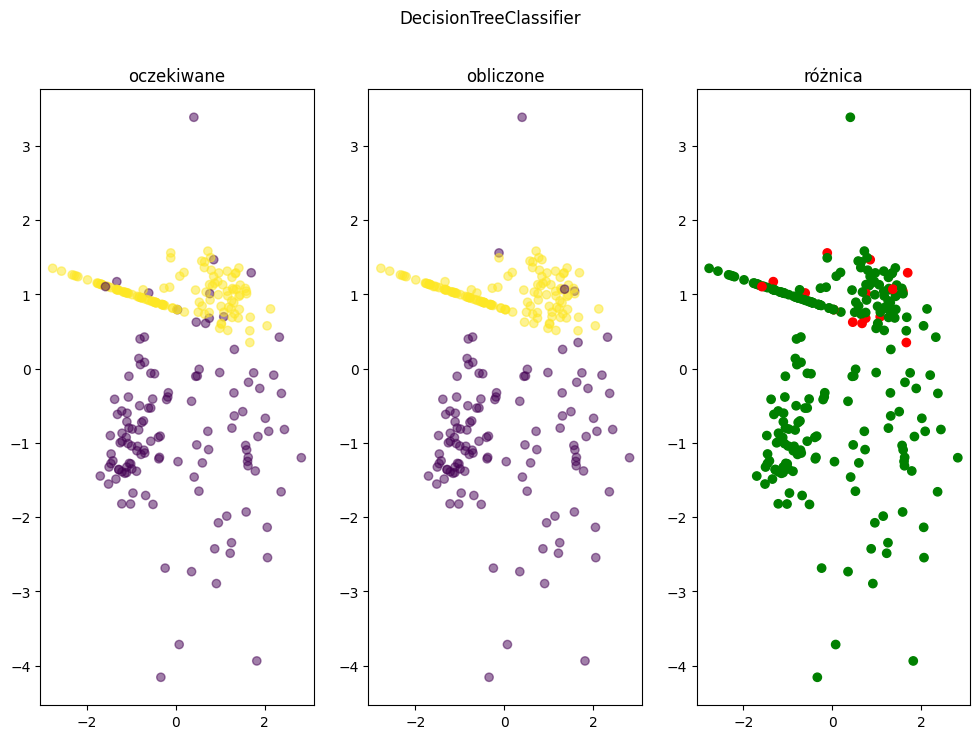

In [93]:
for nazwa, klasyfikator in klasyfikatory.items():
    X_test = df2[nazwa][0]
    y_test = df2[nazwa][1]
    y_pred = df2[nazwa][2]
    plt.figure(figsize=(12, 8))
    plt.subplot(1, 3, 1)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.5)
    plt.title('oczekiwane')
    plt.subplot(1, 3, 2)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, alpha=0.5)
    plt.title('obliczone')
    plt.subplot(1, 3, 3)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=np.where(y_test==y_pred, 'green', 'red'))
    plt.title('różnica')
    plt.suptitle(f"{nazwa}")
    plt.show()

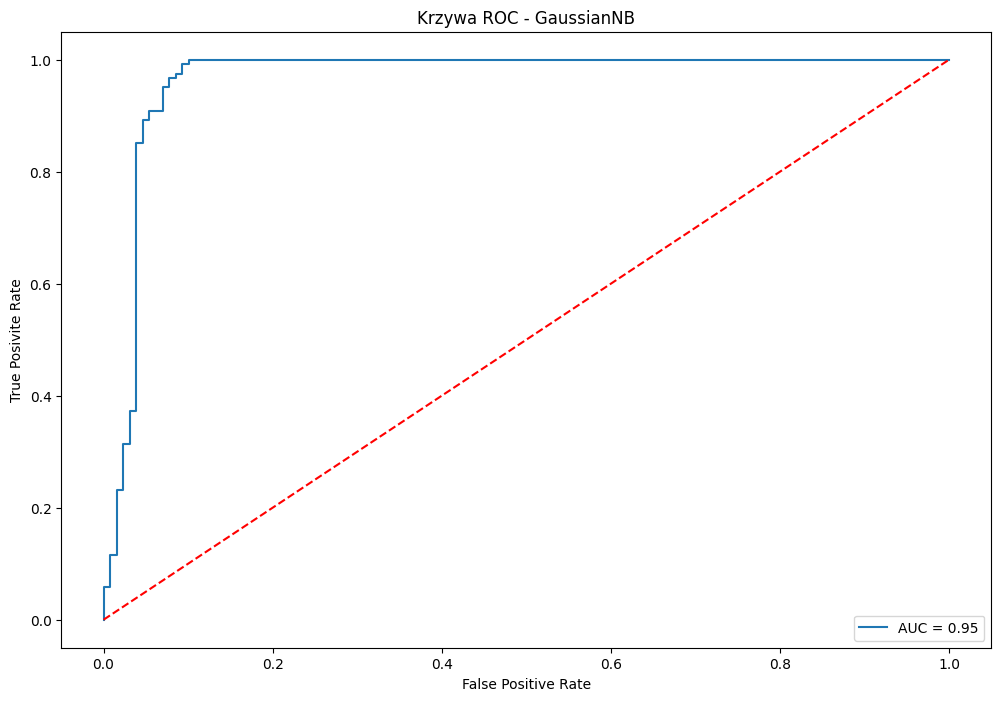

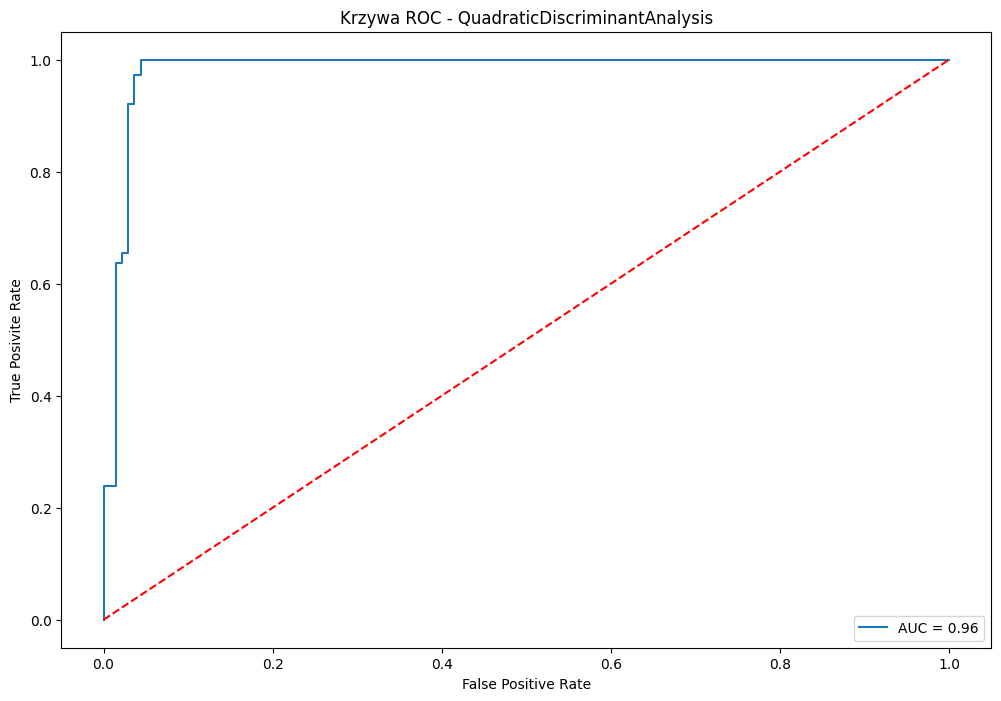

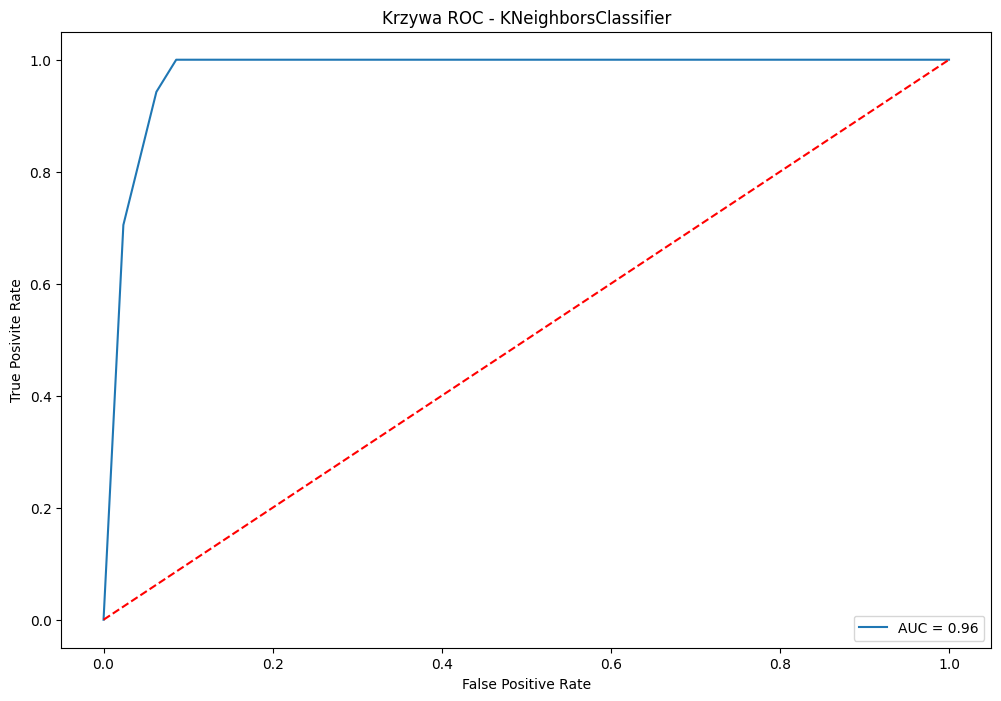

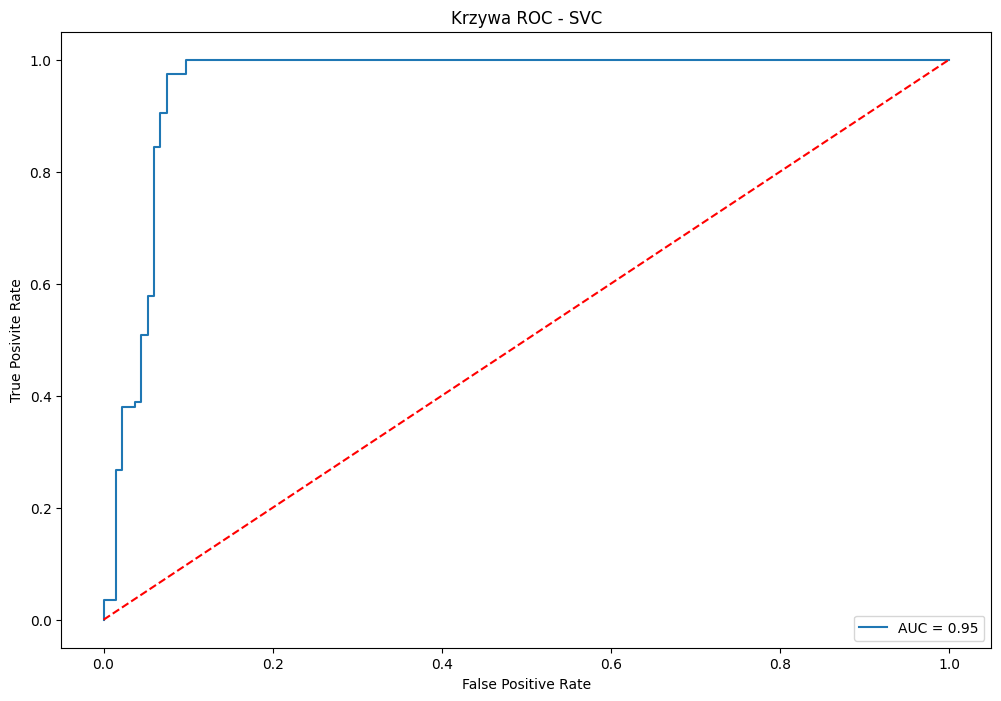

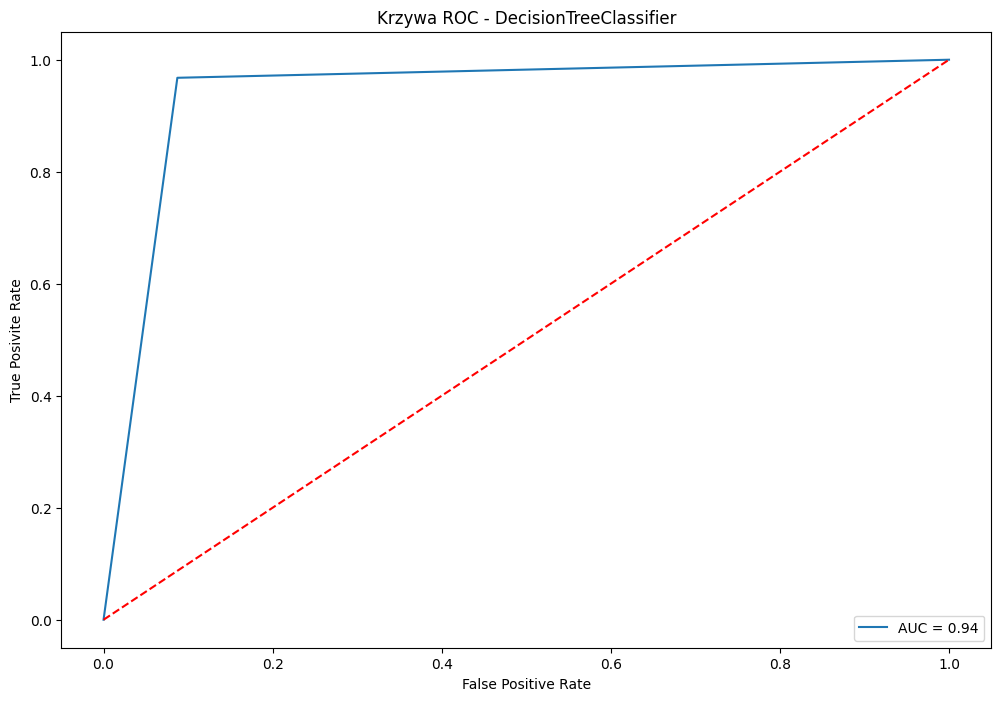

In [94]:
for nazwa, klasyfikator in klasyfikatory.items():
    X_test = df2[nazwa][0]
    y_test = df2[nazwa][1]
    y_pred = df2[nazwa][2]
    roc = df2[nazwa][3]
    X_train = df2[nazwa][4]
    y_train = df2[nazwa][5]
    clf = klasyfikator
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(12, 8))
    plt.title(f'Krzywa ROC - {nazwa}')
    plt.plot(fpr, tpr, label=f"AUC = {round(roc, 2)}")
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Posivite Rate')
    plt.legend(loc='lower right')
    plt.show()

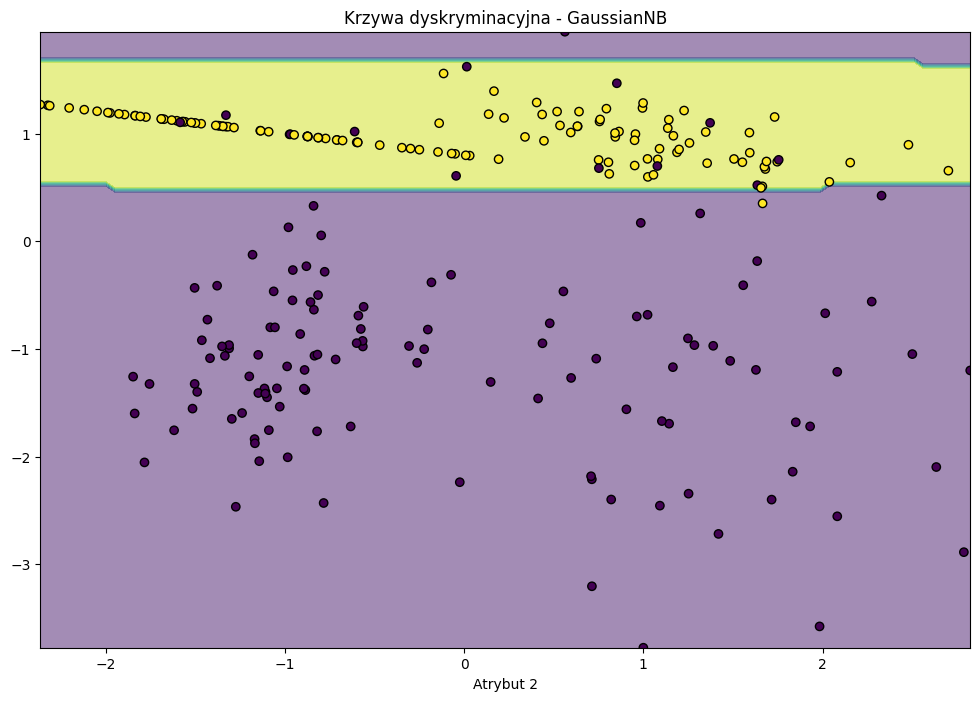

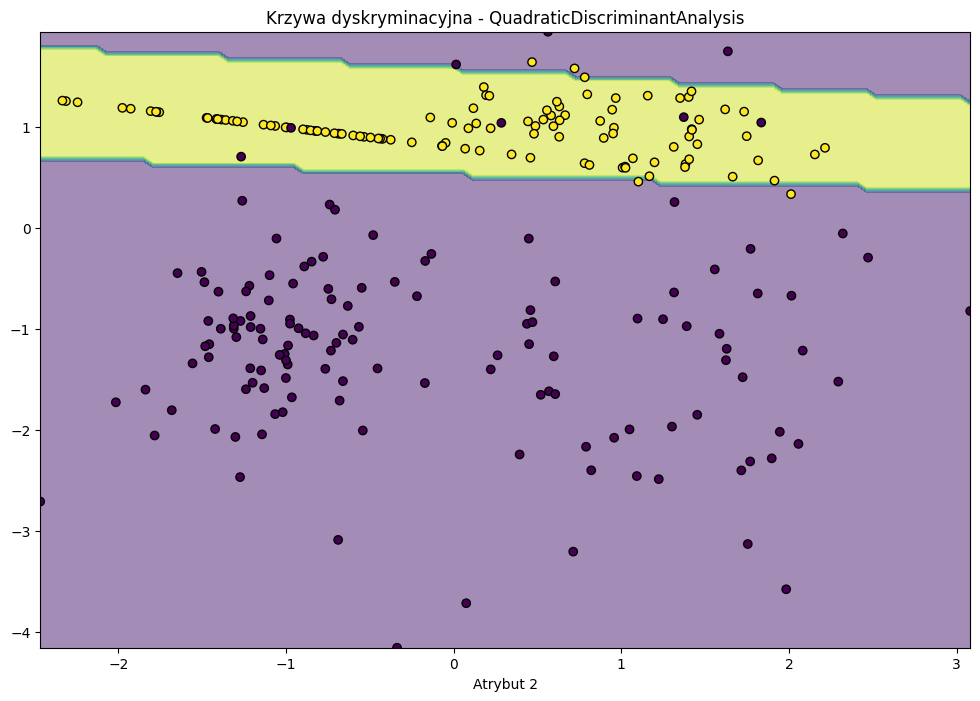

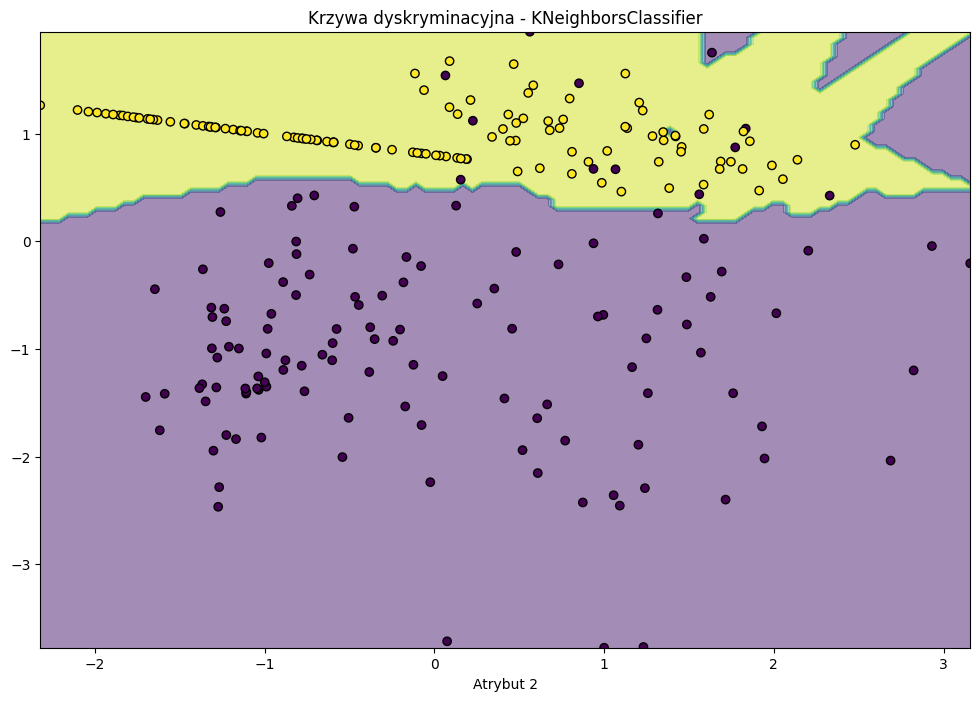

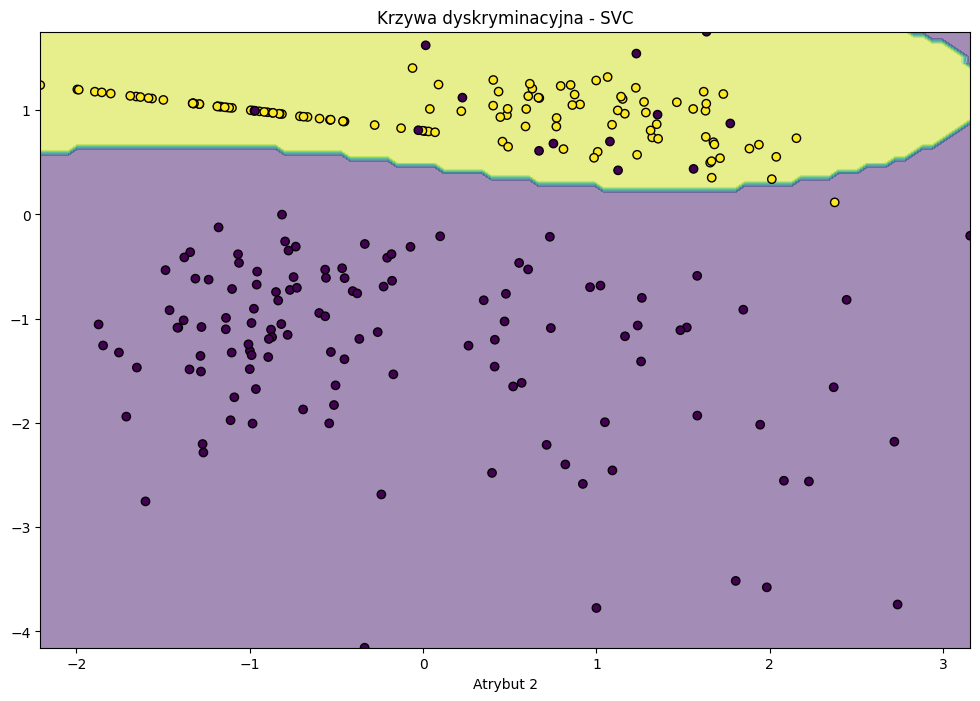

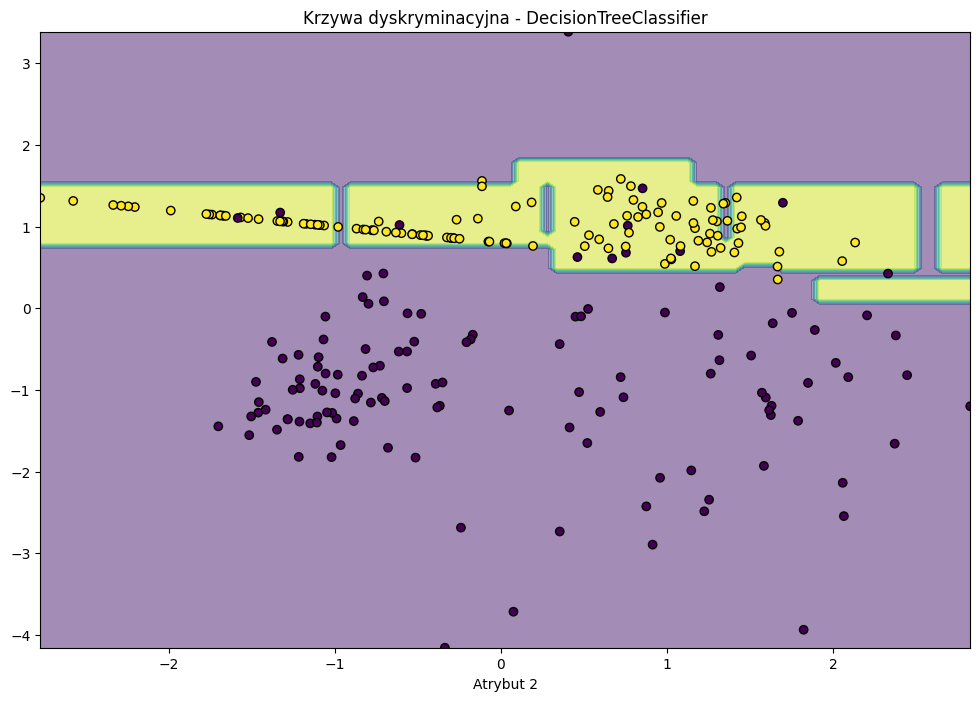

In [95]:
for nazwa, klasyfikator in klasyfikatory.items():
    X_test = df2[nazwa][0]
    y_test = df2[nazwa][1]
    y_pred = df2[nazwa][2]
    X_train = df2[nazwa][4]
    y_train = df2[nazwa][5]
    clf = klasyfikator
    clf.fit(X_train, y_train)
    points = 100
    xx, yy = np.meshgrid(np.linspace(np.min(X_test[:,0]), np.max(X_test[:, 0]), points), np.linspace(np.min(X_test[:, 1]), np.max(X_test[:, 1]), points))
    dane = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = clf.predict(dane)
    Z = np.array(Z).reshape(points, points)
    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k')
    plt.title(f"Krzywa dyskryminacyjna - {nazwa}")
    plt.xlabel("Atrybut 1")
    plt.xlabel("Atrybut 2")
    plt.show()